In [19]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline
from pandas.core import datetools
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
years = mdates.YearLocator()
months = mdates.MonthLocator()
myFmt = mdates.DateFormatter('%Y-%m-%d')

In [20]:
rawDataset = pd.read_csv('QCOM (2).csv')
rawDataset['Date'] = pd.to_datetime(rawDataset['Date'], infer_datetime_format=True)
dataset = rawDataset.set_index(['Date'])
print(dataset.tail(10), dataset.describe())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-02-15  52.080002  52.360001  51.599998  51.980000  51.980000  12239500
2019-02-19  52.000000  52.480000  51.750000  52.009998  52.009998   8258400
2019-02-20  52.250000  52.919998  52.139999  52.450001  52.450001  12863700
2019-02-21  52.500000  52.590000  51.900002  52.349998  52.349998   7826200
2019-02-22  52.689999  53.150002  52.639999  53.119999  53.119999  13394500
2019-02-25  53.779999  53.970001  52.900002  52.990002  52.990002  15341700
2019-02-26  53.080002  53.220001  52.279999  53.029999  53.029999  11366700
2019-02-27  52.950001  53.130001  52.270000  53.040001  53.040001  10426200
2019-02-28  53.000000  53.759998  52.709999  53.389999  53.389999  19000200
2019-03-01  54.000000  54.400002  53.709999  54.200001  54.200001  12657800             Open       High        Low      Close  Adj Close        Volume
count  41.000

In [21]:
#When stock was bought and for how much
startdate = '2019-02-01'
enddate = '2019-01-03'
buy = dataset.loc[startdate]['Open']
stockAmount = 150
invested = buy * stockAmount
print(buy, invested)

49.580002 7437.0003


In [22]:
openRM = dataset['Open'].rolling(window=20, min_periods = 0).mean()
openEMA = dataset['Open'].ewm(span=20, min_periods = 0).mean()
openSTD = dataset['Open'].rolling(window=20, min_periods = 0).std()
print(openRM.tail(15), openEMA.tail(15), openSTD.head(5))

Date
2019-02-08    52.5205
2019-02-11    52.2245
2019-02-12    51.9385
2019-02-13    51.6725
2019-02-14    51.4600
2019-02-15    51.3155
2019-02-19    51.1460
2019-02-20    51.0100
2019-02-21    50.9890
2019-02-22    51.0260
2019-02-25    51.1685
2019-02-26    51.3065
2019-02-27    51.4295
2019-02-28    51.5955
2019-03-01    51.7355
Name: Open, dtype: float64 Date
2019-02-08    51.710519
2019-02-11    51.592855
2019-02-12    51.563344
2019-02-13    51.607103
2019-02-14    51.596423
2019-02-15    51.644430
2019-02-19    51.679587
2019-02-20    51.735782
2019-02-21    51.810824
2019-02-22    51.896900
2019-02-25    52.080775
2019-02-26    52.178110
2019-02-27    52.253137
2019-02-28    52.325589
2019-03-01    52.487735
Name: Open, dtype: float64 Date
2019-01-02         NaN
2019-01-03    0.176777
2019-01-04    0.275378
2019-01-07    0.240970
2019-01-08    0.289913
Name: Open, dtype: float64


Text(0.5, 1.0, 'Rolling Mean and STD')

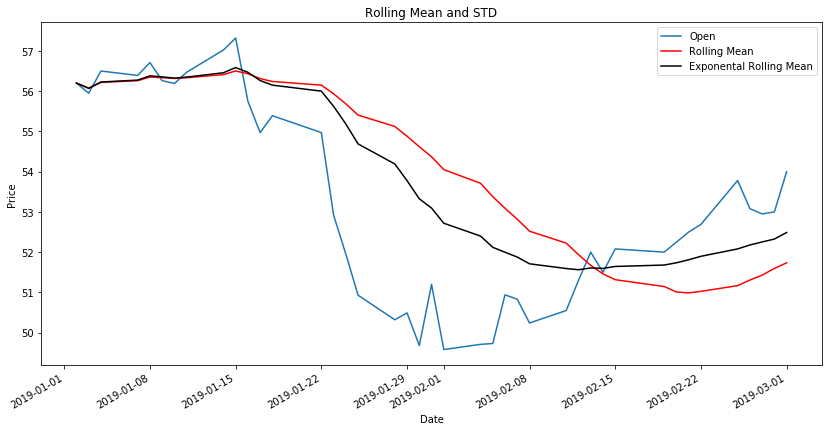

In [23]:
fig, ax = plt.subplots(figsize=(14,7))

ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.plot(dataset.Open)
ax.plot(openRM, label = 'Rolling Mean', color = 'red')
ax.plot(openEMA, label = 'Exponental Rolling Mean', color = 'black')
#plt.plot(openSTD, label = 'Rolling STD', color = 'green')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()
plt.title('Rolling Mean and STD')
# When our data set is below the rolling average short the stock and when it is above hold the stock 

In [24]:
#Trading analysis (when you should hold/short) Negative = short, Positive = hold
trading_pos_raw = dataset['Open'] - openEMA
trading_pos = trading_pos_raw.apply(np.sign) * 1/2
print(trading_pos_raw.tail(10),trading_pos.tail(10))

Date
2019-02-15    0.435572
2019-02-19    0.320413
2019-02-20    0.514218
2019-02-21    0.689176
2019-02-22    0.793099
2019-02-25    1.699224
2019-02-26    0.901892
2019-02-27    0.696864
2019-02-28    0.674411
2019-03-01    1.512265
Name: Open, dtype: float64 Date
2019-02-15    0.5
2019-02-19    0.5
2019-02-20    0.5
2019-02-21    0.5
2019-02-22    0.5
2019-02-25    0.5
2019-02-26    0.5
2019-02-27    0.5
2019-02-28    0.5
2019-03-01    0.5
Name: Open, dtype: float64


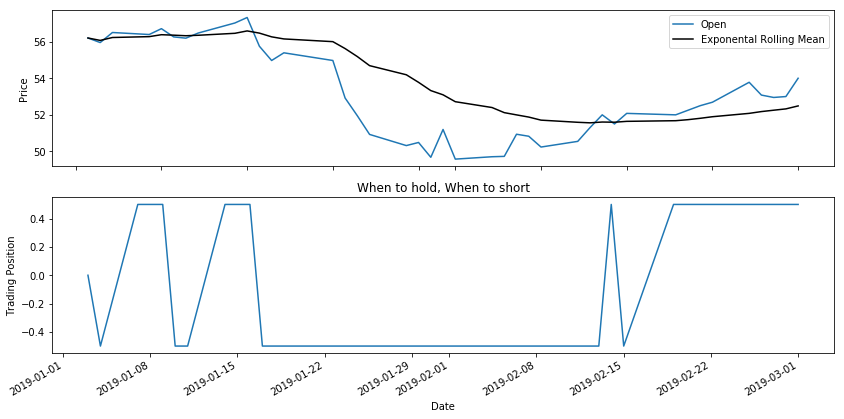

In [25]:
# Adding Lag by one day
final_trade_pos = trading_pos.shift(1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,7))

plt.title('When to hold, When to short')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.plot(dataset.Open)
ax1.plot(openEMA, label = 'Exponental Rolling Mean', color = 'black')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()


ax2.set_ylabel('Trading Position')
ax2.set_xlabel('Date')
ax2.plot(final_trade_pos)
ax2.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

In [26]:
# Taking logreturns for volatility 
%time logReturn = np.log(dataset['Open']/ dataset['Open'].shift(1))

Wall time: 2 ms


Text(0.5, 1.0, 'Daily Log Returns')

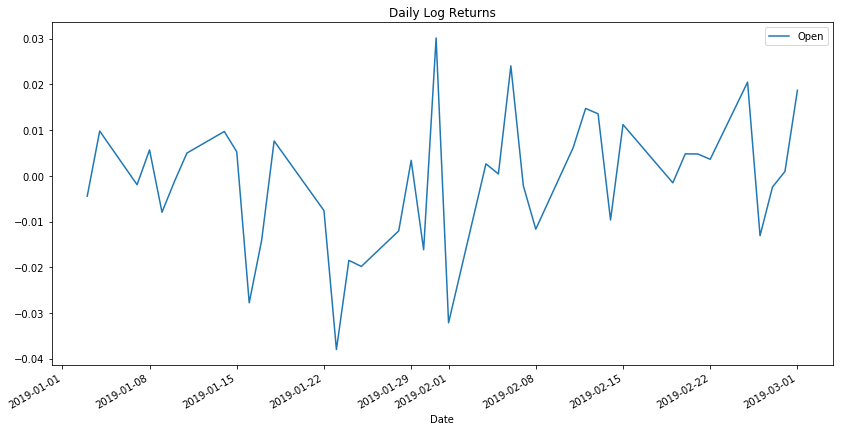

In [27]:
#Plotting log returns
fig, ax = plt.subplots(figsize=(14, 7))

ax.set_xlabel('Date')
ax.plot(logReturn)
ax.legend(loc='best')
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()
plt.title('Daily Log Returns')

Text(0.5, 1.0, 'Moving Volatility ')

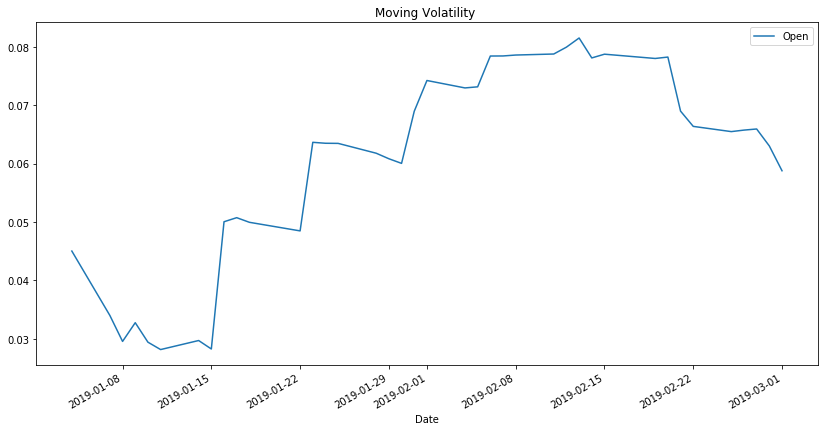

In [28]:
#Moving Volatility  
import math
movingVol = logReturn.rolling(window = 20, min_periods = 0).std() * math.sqrt(20)

fig, ax = plt.subplots(figsize=(14, 7))

ax.set_xlabel('Date')
ax.plot(movingVol)
ax.legend(loc='best')
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()
plt.title('Moving Volatility ')

In [29]:
stratLogReturn = final_trade_pos * logReturn
stratLogReturn.tail(5)

Date
2019-02-25    0.010238
2019-02-26   -0.006551
2019-02-27   -0.001226
2019-02-28    0.000472
2019-03-01    0.009346
Name: Open, dtype: float64

In [30]:
CumStratLogReturns = stratLogReturn.cumsum()
CumstratReturns = np.exp(CumStratLogReturns) -1
CumstratReturns.tail(5)


Date
2019-02-25    0.025467
2019-02-26    0.018771
2019-02-27    0.017523
2019-02-28    0.018003
2019-03-01    0.027562
Name: Open, dtype: float64

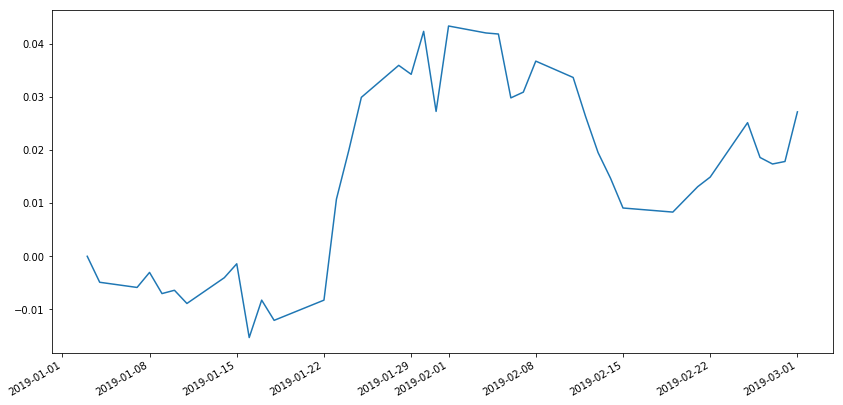

In [31]:
fig, ax = plt.subplots(figsize=(14,7))

ax.plot(CumStratLogReturns)
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

In [ ]:
# Future todo: Track the total returns of this strategy then compare to buying and hold the stock